Please create a heatmap which combines day of week and hour of day to see the distribution of the number of orders, to be more specific: based on orders dataframe, 
    
1. create a new dataframe with first column name as order_dow, and the rest of columns name as the content of order_hour_of_day, dataframe value as count of orders. 

2. Use seaborn heatmap function to create a heatmap visualization based on the dataframe above. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math as statistics
sns.set(style="darkgrid")

In [2]:
orders = pd.read_csv("orders.csv")

In [3]:
orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,1,2,8,NaN
1,2398795,1,2,3,7,15.0
2,473747,1,3,3,12,21.0
3,2254736,1,4,4,7,29.0
4,431534,1,5,4,15,28.0


In [4]:
orders.pivot_table(values = orders, index='order_dow', columns='order_hour_of_day' )  
#count as orders, 对order 进行计数count                   

days_since_prior_order                                   \
order_hour_of_day                     0          1          2          3    
order_dow                                                                   
0                              11.849593  12.171938  12.824074  12.568736   
1                              12.227763  12.098085  11.565686  11.793103   
2                              12.051002  12.594429  11.695900  11.759883   
3                              12.230435  12.356938  12.153415  12.282895   
4                              11.834814  12.187279  11.645660  12.445652   
5                              11.525276  11.750638  11.864496  12.216667   
6                              11.671104  11.972452  11.631858  12.238806   

                                                                          \
order_hour_of_day         4          5          6          7          8    
order_dow                                                                  
0                  12.444444  12.020128  11.335667  11.092416  11.238591   
1                  12.112434  11.695338  10.784758  10.723816  10.616824   
2                  12.510057  11.690205  10.969630  10.785975  10.796299   
3                  11.791420  11.304144  10.528654  10.492569  10.433030   
4                  11.712230  11.222666  10.311663  10.139326  10.184508   
5                  11.887707  11.571238  10.480138  10.441817  10.255518   
6                  12.512855  11.580492  11.255632  10.809181  11.143160   

                              ...        user_id                 \
order_hour_of_day         9   ...             14             15   
order_dow                     ...                                 
0                  11.496259  ...  103206.730147  103075.886236   
1                  10.683898  ...  102956.337418  103075.864966   
2                  10.958546  ...  102920.036720  102306.879474   
3                  10.450978  ...  103272.824203  103031.032787   
4                  10.249376  ...  103236.585636  103489.920636   
5                  10.191918  ...  102757.468656  102987.642876   
6                  11.402247  ...  103117.946036  103358.715460   

                                                                               \
order_hour_of_day             16             17             18             19   
order_dow                                                                       
0                  103317.478903  103196.725304  103028.161673  102696.045511   
1                  102880.545832  102986.531963  102863.959692  102616.573854   
2                  102661.247303  103314.135797  103338.313185  102959.662916   
3                  103216.961047  102413.168401  102857.340066  103517.701491   
4                  103368.265450  103190.911635  103278.593163  102968.556124   
5                  103448.011796  102575.924954  102636.117853  102131.153300   
6                  102743.193099  103299.690506  102923.688579  102875.071623   

                                                                               
order_hour_of_day             20             21             22             23  
order_dow                                                                      
0                  102602.770750  102952.413992  102558.520096  103316.583563  
1                  103784.330569  102406.639203  102939.251335  102651.519751  
2                  103180.319636  101825.741294  103513.735821  103625.269877  
3                  103448.802755  102732.066355  101834.930235  104656.593515  
4                  102738.241999  102445.726010  102503.314458  102622.882728  
5                  102578.132788  102457.751760  102451.377701  103359.943210  
6                  103121.040920  102592.474241  102128.466010  102525.496304  

[7 rows x 96 columns]

count as orders, 对order 进行计数count       

In [35]:
orders.pivot_table(index='order_dow', columns='order_hour_of_day', values='order_id',
                   aggfunc = lambda x: x.value_counts().count())   

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,
0,3936,2398,1409,963,813,1168,3329,12410,28108,40798,...,54552,53954,49463,39753,29572,22654,18277,14423,11246,6887
1,3674,1830,1105,748,809,1607,5370,16571,34116,51908,...,46764,46403,44761,36792,28977,22145,16281,11943,8992,5620
2,3059,1572,943,719,744,1399,4758,13245,24635,36314,...,37173,37469,37541,32151,26470,20084,15039,10653,8146,5358
3,2952,1495,953,654,719,1355,4562,12396,22553,32312,...,34773,35990,35273,30368,25001,19249,13795,10278,8242,5181
4,2642,1512,899,686,730,1330,4401,12493,21814,31409,...,33625,34222,34093,29378,24425,19350,14186,10796,8812,5645
5,3189,1672,1016,841,910,1574,4866,13434,24015,34232,...,37407,37508,35860,29955,24310,18741,13322,9515,7498,5265
6,3306,1919,1214,863,802,1136,3243,11319,22960,30839,...,38748,38093,35562,30398,24157,18346,13392,10501,8532,6087


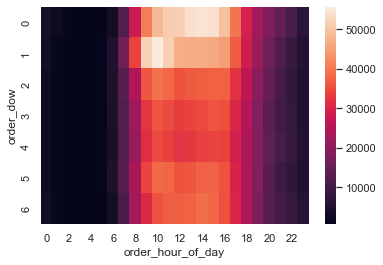

In [32]:
sns.heatmap(orders.pivot_table(index='order_dow', columns='order_hour_of_day', 
                               values='order_id', aggfunc = lambda x: x.value_counts().count()))

In [36]:
orders.pivot_table(index='order_dow', columns='order_hour_of_day', values='order_id',
                   aggfunc=lambda x: len(x.unique()))

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,
0,3936,2398,1409,963,813,1168,3329,12410,28108,40798,...,54552,53954,49463,39753,29572,22654,18277,14423,11246,6887
1,3674,1830,1105,748,809,1607,5370,16571,34116,51908,...,46764,46403,44761,36792,28977,22145,16281,11943,8992,5620
2,3059,1572,943,719,744,1399,4758,13245,24635,36314,...,37173,37469,37541,32151,26470,20084,15039,10653,8146,5358
3,2952,1495,953,654,719,1355,4562,12396,22553,32312,...,34773,35990,35273,30368,25001,19249,13795,10278,8242,5181
4,2642,1512,899,686,730,1330,4401,12493,21814,31409,...,33625,34222,34093,29378,24425,19350,14186,10796,8812,5645
5,3189,1672,1016,841,910,1574,4866,13434,24015,34232,...,37407,37508,35860,29955,24310,18741,13322,9515,7498,5265
6,3306,1919,1214,863,802,1136,3243,11319,22960,30839,...,38748,38093,35562,30398,24157,18346,13392,10501,8532,6087


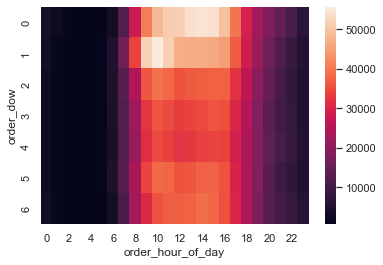

In [44]:
sns.heatmap(orders.pivot_table(index='order_dow', columns='order_hour_of_day', values='order_id',
                   aggfunc=lambda x: len(x.unique())))

In [37]:
orders.pivot_table(index='order_dow', columns='order_hour_of_day', values='order_id',
                   aggfunc=lambda x: len(x.dropna().unique()))

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,
0,3936,2398,1409,963,813,1168,3329,12410,28108,40798,...,54552,53954,49463,39753,29572,22654,18277,14423,11246,6887
1,3674,1830,1105,748,809,1607,5370,16571,34116,51908,...,46764,46403,44761,36792,28977,22145,16281,11943,8992,5620
2,3059,1572,943,719,744,1399,4758,13245,24635,36314,...,37173,37469,37541,32151,26470,20084,15039,10653,8146,5358
3,2952,1495,953,654,719,1355,4562,12396,22553,32312,...,34773,35990,35273,30368,25001,19249,13795,10278,8242,5181
4,2642,1512,899,686,730,1330,4401,12493,21814,31409,...,33625,34222,34093,29378,24425,19350,14186,10796,8812,5645
5,3189,1672,1016,841,910,1574,4866,13434,24015,34232,...,37407,37508,35860,29955,24310,18741,13322,9515,7498,5265
6,3306,1919,1214,863,802,1136,3243,11319,22960,30839,...,38748,38093,35562,30398,24157,18346,13392,10501,8532,6087


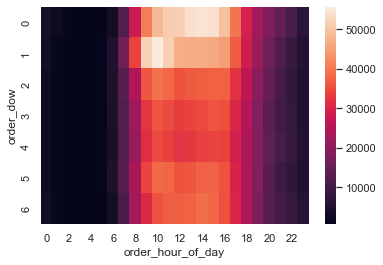

In [43]:
sns.heatmap(orders.pivot_table(index='order_dow', columns='order_hour_of_day', values='order_id',
                   aggfunc=lambda x: len(x.dropna().unique())))

In [38]:
orders.pivot_table(index='order_dow', columns='order_hour_of_day', values='order_id',
                   aggfunc='count')

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,
0,3936,2398,1409,963,813,1168,3329,12410,28108,40798,...,54552,53954,49463,39753,29572,22654,18277,14423,11246,6887
1,3674,1830,1105,748,809,1607,5370,16571,34116,51908,...,46764,46403,44761,36792,28977,22145,16281,11943,8992,5620
2,3059,1572,943,719,744,1399,4758,13245,24635,36314,...,37173,37469,37541,32151,26470,20084,15039,10653,8146,5358
3,2952,1495,953,654,719,1355,4562,12396,22553,32312,...,34773,35990,35273,30368,25001,19249,13795,10278,8242,5181
4,2642,1512,899,686,730,1330,4401,12493,21814,31409,...,33625,34222,34093,29378,24425,19350,14186,10796,8812,5645
5,3189,1672,1016,841,910,1574,4866,13434,24015,34232,...,37407,37508,35860,29955,24310,18741,13322,9515,7498,5265
6,3306,1919,1214,863,802,1136,3243,11319,22960,30839,...,38748,38093,35562,30398,24157,18346,13392,10501,8532,6087


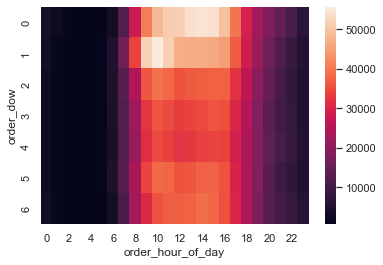

In [42]:
sns.heatmap(orders.pivot_table(index='order_dow', columns='order_hour_of_day', values='order_id',
                   aggfunc='count'))

In [39]:
orders.pivot_table(index='order_dow', columns='order_hour_of_day', values='order_id',
                   aggfunc=pd.Series.nunique)

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,
0,3936,2398,1409,963,813,1168,3329,12410,28108,40798,...,54552,53954,49463,39753,29572,22654,18277,14423,11246,6887
1,3674,1830,1105,748,809,1607,5370,16571,34116,51908,...,46764,46403,44761,36792,28977,22145,16281,11943,8992,5620
2,3059,1572,943,719,744,1399,4758,13245,24635,36314,...,37173,37469,37541,32151,26470,20084,15039,10653,8146,5358
3,2952,1495,953,654,719,1355,4562,12396,22553,32312,...,34773,35990,35273,30368,25001,19249,13795,10278,8242,5181
4,2642,1512,899,686,730,1330,4401,12493,21814,31409,...,33625,34222,34093,29378,24425,19350,14186,10796,8812,5645
5,3189,1672,1016,841,910,1574,4866,13434,24015,34232,...,37407,37508,35860,29955,24310,18741,13322,9515,7498,5265
6,3306,1919,1214,863,802,1136,3243,11319,22960,30839,...,38748,38093,35562,30398,24157,18346,13392,10501,8532,6087


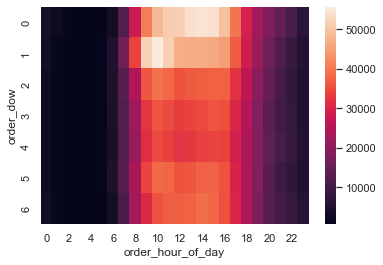

In [41]:
sns.heatmap(orders.pivot_table(index='order_dow', columns='order_hour_of_day', values='order_id',
                               aggfunc=pd.Series.nunique))

In [19]:
value = orders.groupby(['order_dow','order_hour_of_day'])['order_id'].count()

C:\Users\18202\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\18202\Anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


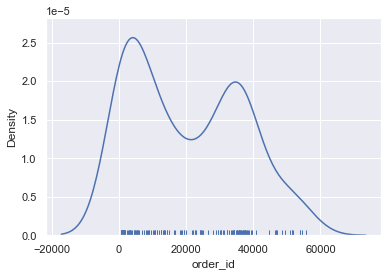

In [10]:
sns.distplot(x, hist=False, rug=True)

C:\Users\18202\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


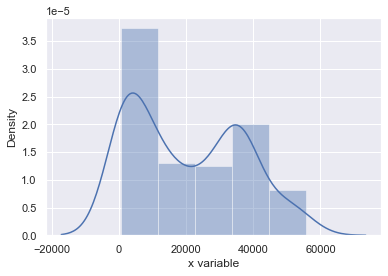

In [11]:
import pandas as pd
x = pd.Series(x, name="x variable")
ax = sns.distplot(x)

In [14]:
sns.heatmap('orders')

ValueError: Must pass 2-d input. shape=()

In [13]:
orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,1,2,8,NaN
1,2398795,1,2,3,7,15.0
2,473747,1,3,3,12,21.0
3,2254736,1,4,4,7,29.0
4,431534,1,5,4,15,28.0


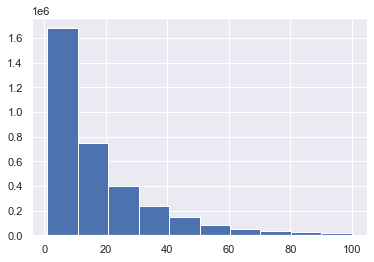

In [14]:
orders['order_number'].hist()

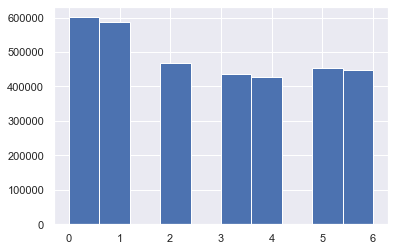

In [15]:
orders['order_dow'].hist()

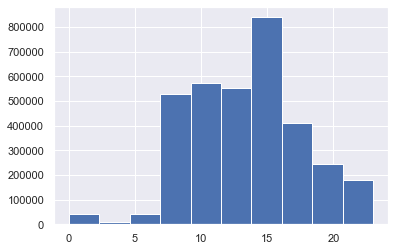

In [16]:
orders['order_hour_of_day'].hist()